In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [2]:
!dir | findstr -i housing.csv 

04/01/2021  12:30 PM         1,195,690 housing.csv


In [3]:
housing = pd.read_csv('housing.csv')
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
#Identifying Outliers and what is the proportion of Outliers
x = housing[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'households', 
             'total_bedrooms', 'population']]        
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
Housing_IQR = Q3 - Q1
Housing_IQR

median_house_value    145125.00000
median_income              2.17985
total_rooms             1700.25000
housing_median_age        19.00000
households               325.00000
total_bedrooms           351.00000
population               938.00000
dtype: float64

In [5]:
df_o = housing[~((housing < (Q1 - 1.5 * Housing_IQR)) |(housing > (Q3 + 1.5 * Housing_IQR))).any(axis=1)]
print(len(df_o))

17621


In [6]:
lower_limit = Q1 - 1.5*Housing_IQR
upper_limit = Q3 + 1.5*Housing_IQR

outliers = housing[((housing < lower_limit) | (housing > upper_limit )).any(axis=1)]
print(len(outliers))

non_outliers = housing[~((housing < lower_limit) | (housing > upper_limit )).any(axis=1)]
print(len(non_outliers))

3019
17621


In [7]:
proportion_outliers = len(outliers) / len(housing)
print(proportion_outliers)

0.14626937984496124


In [8]:
 #keeping outliers even though there are is a quite a few outliers. We can speculate but its better to ask an industry leader

In [9]:
#from previous notebook we know total berdrooms has some missing values, We will replace null values with the row median

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'median')

In [11]:
housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [12]:
#check median values for each row

In [13]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [14]:
housing_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [15]:
X = imputer.transform(housing_num)

In [16]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [17]:
#cross check for missing values
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [18]:
#no missing numerical values as seen above

In [19]:
print(housing_tr.describe())
print(housing_tr.info())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

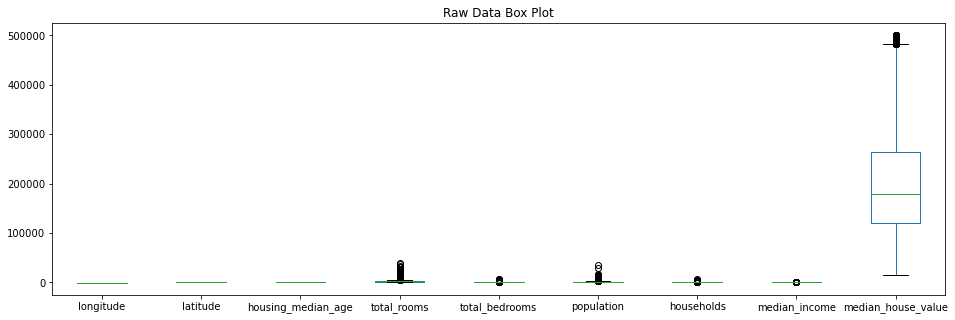

In [20]:
housing_tr.plot(kind='box', title='Raw Data Box Plot', figsize=(16, 5))
plt.show()

<AxesSubplot:>

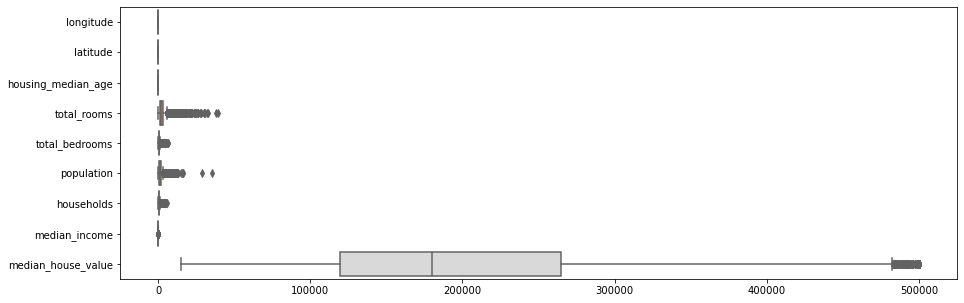

In [21]:
mpl.rcParams['figure.figsize'] = (15,5)
sns.boxplot(data=housing_tr, palette="Set3", orient='h')

In [22]:
#I am going to make the same boxplots except dropping latitude, longitude, and median_house_value.

<AxesSubplot:>

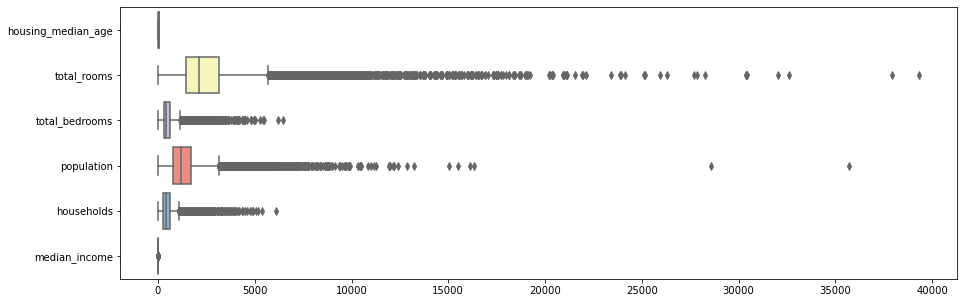

In [23]:
X = housing_tr[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]

mpl.rcParams['figure.figsize'] = (15,5)
sns.boxplot(data=X, palette="Set3", orient='h')

In [24]:
#not sure why total rooms as so many outliers. This is total rooms in this location or block. With some feature engineering
#we can add rooms per household and population per household category

In [25]:
#feature engineering

In [26]:
housing_tr['bedrooms_per_room'] = housing_tr['total_bedrooms']/housing_tr['total_rooms']
housing_tr['population_per_household'] = housing_tr['population']/housing_tr['households']
housing_tr['rooms_per_household'] = housing_tr['total_rooms']/housing_tr['households']

In [27]:
corr_matrix = housing_tr.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

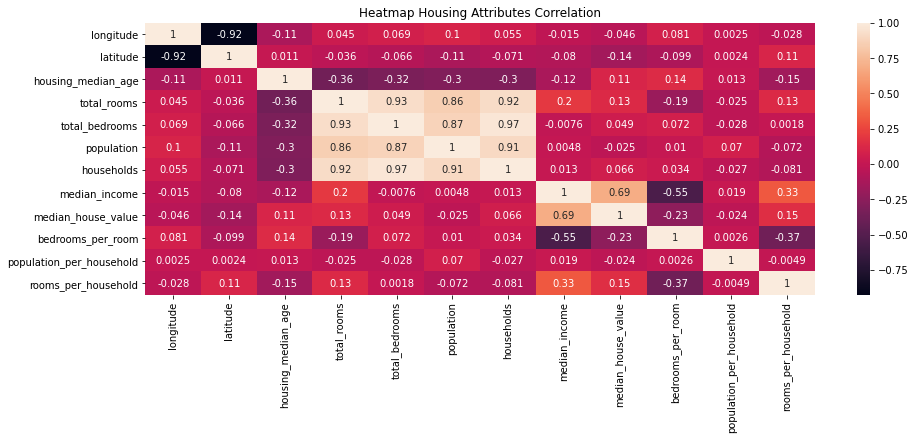

In [28]:
correlated_housing = housing_tr.corr()
sns.heatmap(correlated_housing, annot=True)
plt.title('Heatmap Housing Attributes Correlation')
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

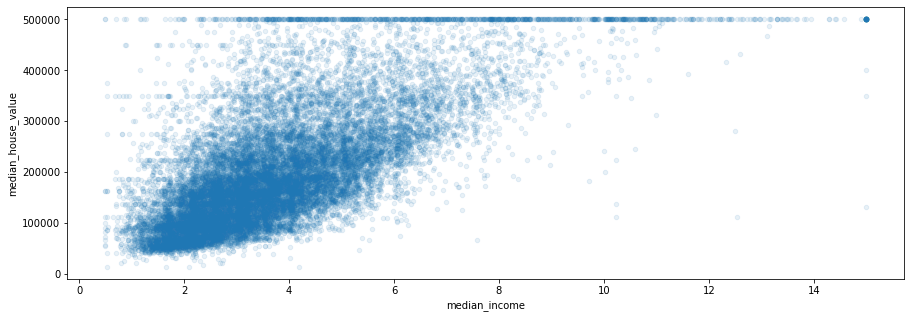

In [29]:
housing_tr.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

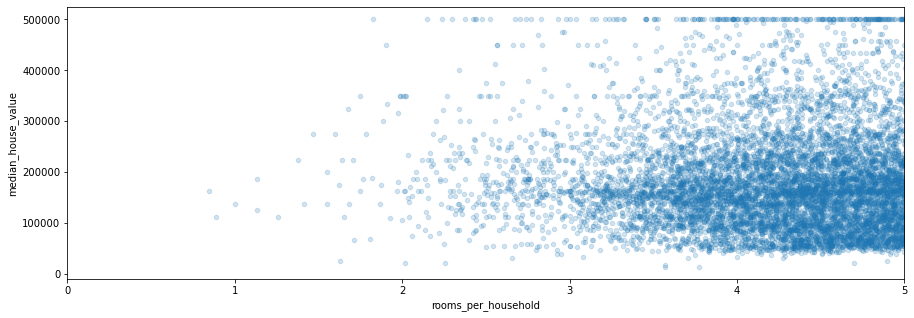

In [30]:
housing_tr.plot(kind='scatter', x='rooms_per_household', y='median_house_value', alpha=0.2)
ax = plt.gca()
ax.set_xlim([0,5])
plt.show()

In [31]:
#rooms per household has a somewhat strong negative correlation to median home value

In [32]:
#I will create the boxplot above with newly engineered features
#without outliers
#without longitude, latitude, median_house_value

In [33]:
outliers_tr = housing_tr[((housing_tr < lower_limit) | (housing_tr > upper_limit )).any(axis=1)]
print(len(outliers))

non_outliers_tr = housing_tr[~((housing_tr < lower_limit) | (housing_tr > upper_limit )).any(axis=1)]
print(len(non_outliers))

3019
17621


In [34]:
cleaned_non_outliers_for_boxplot = non_outliers_tr[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
                                                'households', 'median_income', 'bedrooms_per_room', 'population_per_household',
                                                'rooms_per_household']]

<AxesSubplot:>

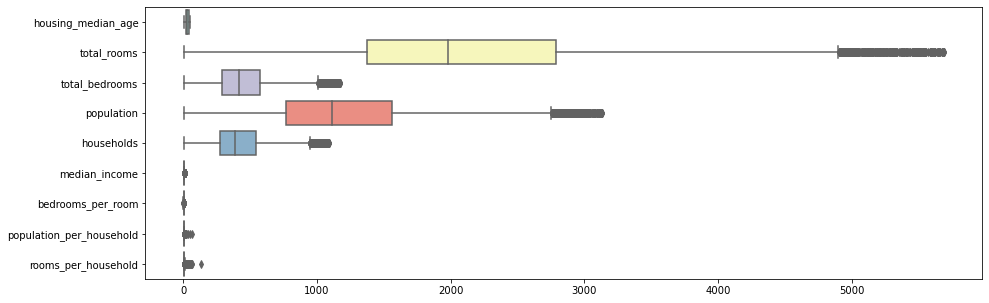

In [35]:
sns.boxplot(data=cleaned_non_outliers_for_boxplot, palette="Set3", orient='h')

In [36]:
#perhaps we can filter out a few more attributes to see the other ones more clearly

<AxesSubplot:>

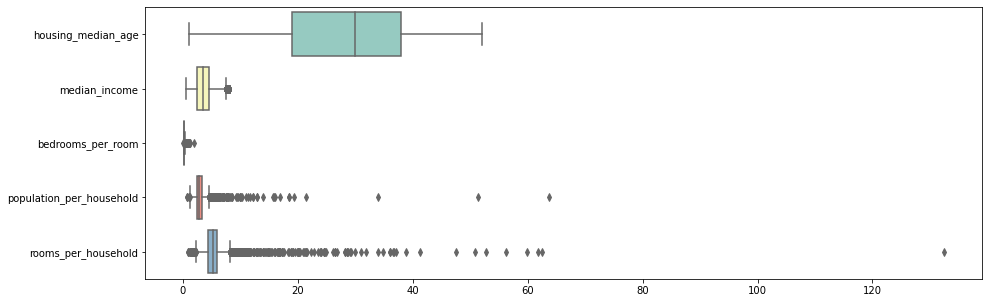

In [37]:
cleaned_non_outliers_for_boxplot2 = non_outliers_tr[['housing_median_age', 
                                                'median_income', 'bedrooms_per_room', 'population_per_household',
                                                'rooms_per_household']]
sns.boxplot(data=cleaned_non_outliers_for_boxplot2, palette="Set3", orient='h')

<AxesSubplot:>

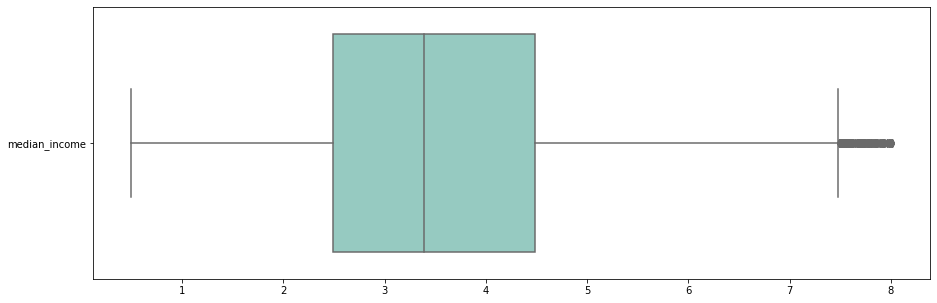

In [39]:
median_income_box = non_outliers_tr[['median_income']]
sns.boxplot(data=median_income_box, palette="Set3", orient='h')

In [42]:
#in 1990 the median household income was between $25,000 and $45,000

In [43]:
print(housing_tr.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [44]:
#I think something is wrong with total bedrooms data. It is extremely low compared to total rooms, and mean bedrooms per household 
#is less than one. It also was the only row with missing values. I will drop this category for my attempt at a
#price prediction model
#I will also drio few more attributes and replace them with my new featured attributes
#Info below shows the central tendancies for all attributes, the average populaton per household we about 3.07, average rooms
#per household was about 5.42, median houshold value = $206,855, median age = 28.639, median household income = $38,706.71
#about 499.539 households per location(neighborhood block)

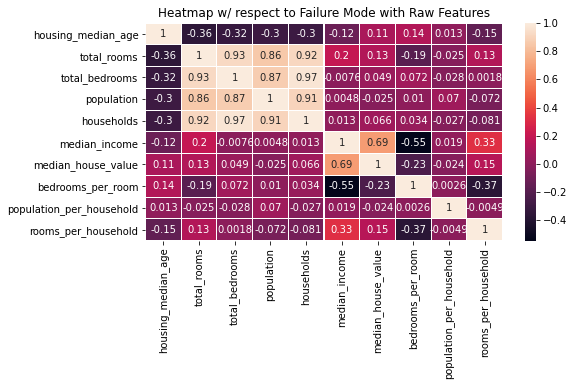

In [46]:
corr = housing_tr.drop(['longitude', 'latitude'],axis=1).corr()
fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(corr, annot=True,linewidths=.1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)
plt.title("Heatmap w/ respect to Failure Mode with Raw Features")
plt.show()

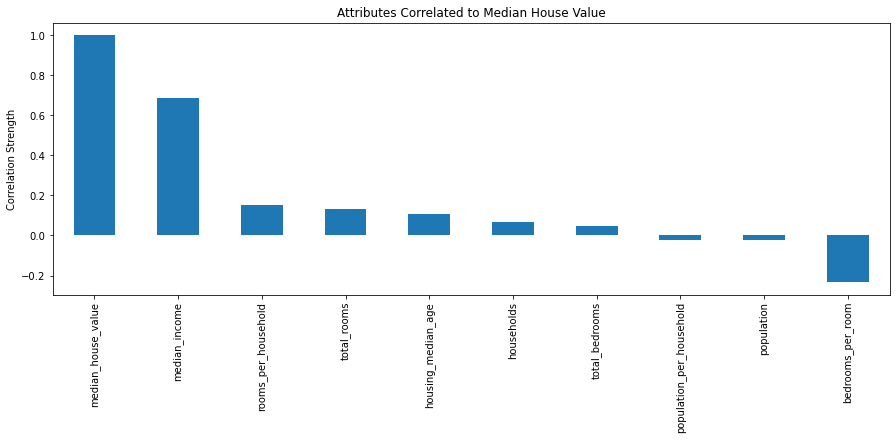

In [47]:
corr = corr.sort_values("median_house_value", ascending=False)
corr["median_house_value"].plot(kind='bar')
plt.title("Attributes Correlated to Median House Value")
plt.ylabel("Correlation Strength")
plt.show()

In [50]:
X= housing_tr.drop(['longitude', 'latitude', 'total_bedrooms', 'bedrooms_per_room', 'median_house_value'], axis=1)
Y= housing_tr['median_house_value']

OLSmodel = sm.OLS(Y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          2.518e+04
Date:                Mon, 05 Apr 2021   Prob (F-statistic):                        0.00
Time:                        08:03:32   Log-Likelihood:                     -2.6143e+05
No. Observations:               20640   AIC:                                  5.229e+05
Df Residuals:                   20633   BIC:                                  5.229e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
housing_median_age        1420.5062     35.203     40.352      0.000    1351.506    1489.507
total_rooms                 -9.9451      0.755    -13.164      0.000     -11.426      -8.464
population                 -41.5838      1.163    -35.745      0.000     -43.864     -39.303
households                 188.6304      4.649     40.573      0.000     179.518     197.743
median_income             4.403e+04    292.035    150.755      0.000    4.35e+04    4.46e+04
population_per_household   -29.1725     52.832     -0.552      0.581    -132.727      74.382
rooms_per_household      -2087.1988    213.515     -9.775      0.000   -2505.706   -1668.692
==============================================================================
Omnibus:                     4751.252   Durbin-Watson:                   0.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15700.681
Skew:                           1.159   Prob(JB):                         0.00
Kurtosis:                       6.590   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

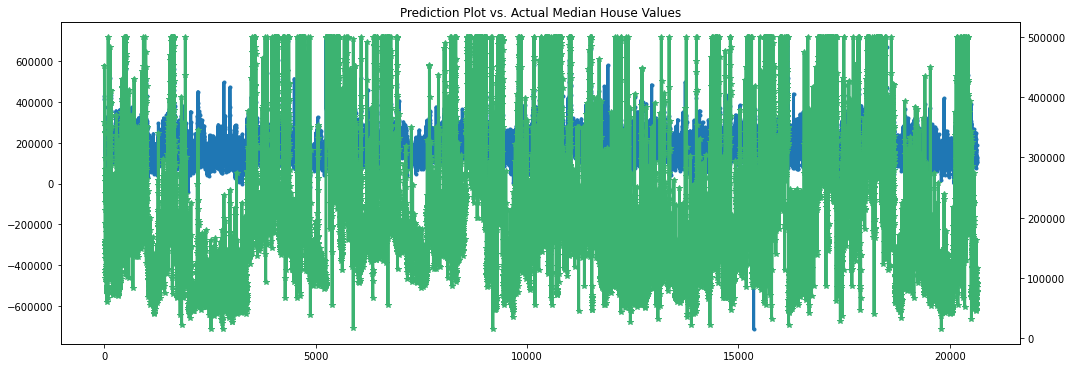

In [54]:
ax = OLSmodelResult.predict(X).plot(linewidth=3, marker='.')
ax2 = ax.twinx()
ax2.plot(housing_tr['median_house_value'], 'mediumseagreen', linewidth=3, marker='*')
plt.tight_layout()
plt.title("Prediction Plot vs. Actual Median House Values")
plt.show()

In [ ]:
#The model indicate a good fit, and perhaps it is. Housing prices have a larger fluctuation relative to the attributes
#we were looking at, and the model creates a tighter fitting price prediction based on given attributes.